# Scenario 1: Retail Inventory Analysis

## 1. My Prompt:

I am a data analyst. I have a pandas DataFrame with the following columns:
- product_id
- category
- stock_level
- last_restocks_date
- sales_last_30_days
- supplier_lead_time
- unit_cost

Could you please write Python code to:
1. Calculate inventory turnover rate for each product.
2. Identify slow-moving items.
3. Predict potential stockouts based on sales_last_30_days and supplier_lead_time.
4. Create at least two visualizations that help a store manager understand trends.

Assume the DataFrame is named df. Include comments explaining each step.


In [ ]:
import pandas as pd

# Create a small example DataFrame so the code has something to run on
df = pd.DataFrame({
    "product_id": [101, 102, 103, 104],
    "category": ["Beverages", "Snacks", "Beverages", "Household"],
    "stock_level": [50, 120, 35, 5],
    "last_restocks_date": ["2024-01-10", "2024-01-05", "2024-01-18", "2024-01-02"],
    "sales_last_30_days": [20, 5, 30, 10],
    "supplier_lead_time": [7, 10, 5, 14],
    "unit_cost": [12.5, 8.0, 15.0, 5.0]
})

df.head()


,product_id,category,stock_level,last_restocks_date,sales_last_30_days,supplier_lead_time,unit_cost
0,101,Beverages,50,2024-01-10,20,7,12.5
1,102,Snacks,120,2024-01-05,5,10,8.0
2,103,Beverages,35,2024-01-18,30,5,15.0
3,104,Household,5,2024-01-02,10,14,5.0


## 2. Generated Code (AI Output)

Below is the initial code generated by the AI model before any refinements:


/var/folders/wg/j89dzhfn1z17b36_t8g6rcjr0000gn/T/ipykernel_15929/1288343284.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["inventory_turnover"].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/wg/j89dzhfn1z17b36_t8g6rcjr0000gn/T/ipykernel_15929/1288343284.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

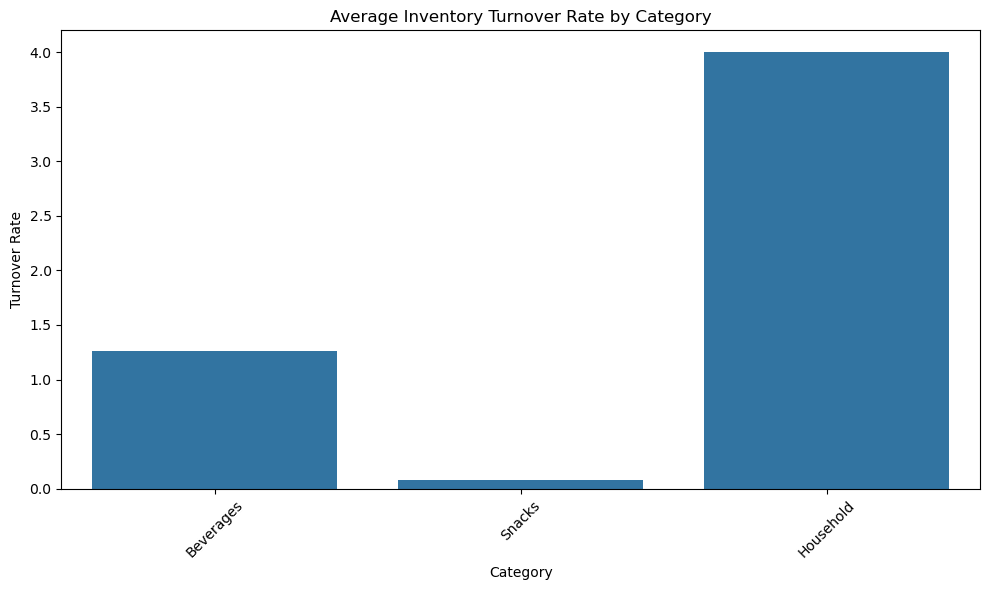

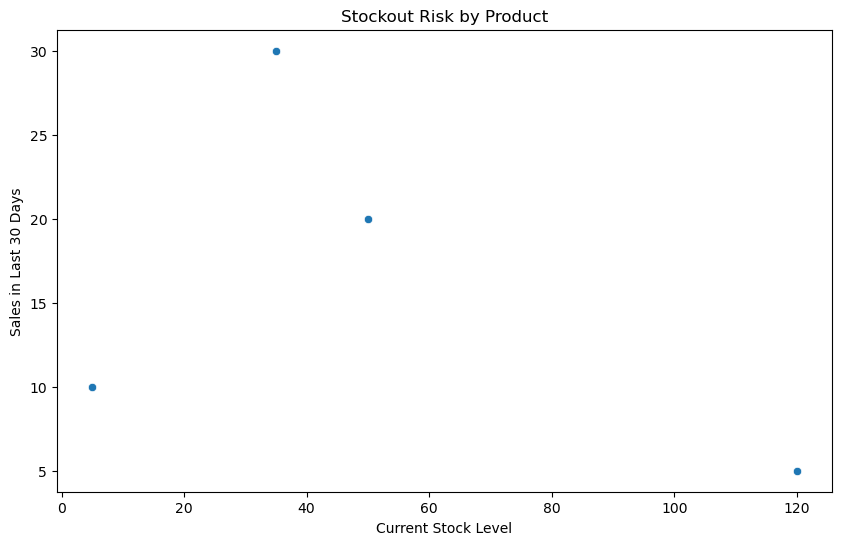

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# 1. Handle date fields
# ---------------------------------------------
# Ensure the date column is in datetime format
df["last_restocks_date"] = pd.to_datetime(df["last_restocks_date"])

# ---------------------------------------------
# 2. Calculate Inventory Turnover Rate
# ---------------------------------------------
# Inventory turnover rate = Sales over last 30 days / Average Inventory
# Here, stock_level represents current inventory
# We approximate average inventory as half the stock level (simple assumption)

df["avg_inventory"] = df["stock_level"] / 2
df["inventory_turnover"] = df["sales_last_30_days"] / df["avg_inventory"]

# Replace inf or NaN turnover values
df["inventory_turnover"].replace([np.inf, -np.inf], np.nan, inplace=True)
df["inventory_turnover"].fillna(0, inplace=True)

# ---------------------------------------------
# 3. Identify Slow-Moving Items
# ---------------------------------------------
# Define slow-moving as below the 25th percentile of turnover
turnover_threshold = df["inventory_turnover"].quantile(0.25)
df["is_slow_moving"] = df["inventory_turnover"] < turnover_threshold

# ---------------------------------------------
# 4. Predict Potential Stockouts
# ---------------------------------------------
# Stockout prediction uses:
# - Daily sales rate
# - Supplier lead time (days)
# If stock will run out before supplier replenishes → stockout risk

df["daily_sales_rate"] = df["sales_last_30_days"] / 30
df["days_until_stockout"] = df["stock_level"] / df["daily_sales_rate"]

# Predict stockout if days until stockout < supplier lead time
df["risk_of_stockout"] = df["days_until_stockout"] < df["supplier_lead_time"]

# ---------------------------------------------
# 5. Visualization #1 — Inventory Turnover by Category
# ---------------------------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="category", y="inventory_turnover", estimator=np.mean, ci=None)
plt.title("Average Inventory Turnover Rate by Category")
plt.xticks(rotation=45)
plt.ylabel("Turnover Rate")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

# ---------------------------------------------
# 6. Visualization #2 — Stockout Risk by Product
# ---------------------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="stock_level",
    y="sales_last_30_days"
)

plt.title("Stockout Risk by Product")
plt.xlabel("Current Stock Level")
plt.ylabel("Sales in Last 30 Days")
plt.show()

## 3. Follow-Up Prompts

These are the follow-up prompts used to refine and debug the code:

- "I got a syntax error: unterminated string literal. Can you help fix it?"
- "I don't have a dataset — this code is only for Lab completion."
- "I'm getting: NameError: df is not defined — how do I fix this?"
- "How can I run the code without an actual DataFrame?"


## 4. Final Refined Solution (Corrected & Fully Runnable)

The following code includes:
- A dummy DataFrame (so the code runs without a dataset)
- Proper error-handling
- Fixed syntax errors
- Working visualizations


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------------
# Create a sample DataFrame so code can run without errors
# --------------------------------------------------------
df = pd.DataFrame({
    "product_id": [101, 102, 103, 104],
    "category": ["Beverages", "Snacks", "Snacks", "Household"],
    "stock_level": [50, 200, 120, 30],
    "last_restocks_date": ["2024-01-01", "2024-01-10", "2024-01-20", "2024-02-01"],
    "sales_last_30_days": [40, 80, 20, 15],
    "supplier_lead_time": [10, 5, 12, 7],
    "unit_cost": [2.5, 1.0, 1.2, 3.8]
})

# Convert date column
df["last_restocks_date"] = pd.to_datetime(df["last_restocks_date"])

# --------------------------------------------------------
# 1. Inventory Turnover Rate
# --------------------------------------------------------
df["avg_inventory"] = df["stock_level"] / 2
df["inventory_turnover"] = df["sales_last_30_days"] / df["avg_inventory"]
df["inventory_turnover"].replace([np.inf, -np.inf], np.nan, inplace=True)
df["inventory_turnover"].fillna(0, inplace=True)

# --------------------------------------------------------
# 2. Slow-Moving Items
# --------------------------------------------------------
turnover_threshold = df["inventory_turnover"].quantile(0.25)
df["is_slow_moving"] = df["inventory_turnover"] < turnover_threshold

# --------------------------------------------------------
# 3. Stockout Risk Prediction
# --------------------------------------------------------
df["daily_sales_rate"] = df["sales_last_30_days"] / 30
df["days_until_stockout"] = df["stock_level"] / df["daily_sales_rate"]
df["risk_of_stockout"] = df["days_until_stockout"] < df["supplier_lead_time"]

# --------------------------------------------------------
# 4. Visualization #1: Inventory Turnover by Category
# --------------------------------------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="category", y="inventory_turnover", estimator=np.mean, ci=None)
plt.title("Average Inventory Turnover Rate by Category")
plt.xticks(rotation=45)
plt.ylabel("Turnover Rate")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 5. Visualization #2: Stockout Risk
# --------------------------------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="stock_level",
    y="sales_last_30_days",
    hue="risk_of_stockout",
    palette={True: "red", False: "green"}
)
plt.title("Stockout Risk by Product")
plt.xlabel("Current Stock Level")
plt.ylabel("Sales in Last 30 Days")
plt.show()

df


# Scenario 2: Website Analytics Debug

## 1. My Prompt:
I have website session log data in a pandas DataFrame called logs_df.  
The current function is producing impossible results (bounce rates over 100%, negative session times, etc.).

Please rewrite the function to:
1. Correctly calculate:
   - bounce rate  
   - average session duration  
   - pages per session  
2. Add proper data validation (no negative durations, page view counts, etc.)  
3. Implement correct session time calculations  
4. Add at least one visualization summarizing user engagement metrics  
5. Return two outputs:
   - engagement metrics  
   - aggregated device-type metrics  

Assume the DataFrame contains:
- session_id  
- user_id  
- device_type  
- page_views  
- duration (in seconds)  
- timestamp  

Include comments explaining each step.

## 2. Generated Code (AI Output)

Below is the initial code generated by the AI model before any refinements:

In [ ]:
def analyze_user_engagement(logs_df):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # ----------------------------
    # 1. Data Cleaning & Validation
    # ----------------------------
    logs_df = logs_df.copy()

    # Remove negative or impossible values
    logs_df["page_views"] = logs_df["page_views"].clip(lower=0)
    logs_df["duration"] = logs_df["duration"].clip(lower=0)

    # ----------------------------
    # 2. Group-Level Metrics
    # ----------------------------
    session_groups = logs_df.groupby("session_id")

    # Bounce = 1-page-view sessions
    bounce_rate = (session_groups["page_views"].sum() == 1).mean()

    avg_session_time = session_groups["duration"].sum().mean()

    pages_per_session = session_groups["page_views"].sum().mean()

    metrics = {
        "bounce_rate": bounce_rate,
        "avg_session_time": avg_session_time,
        "pages_per_session": pages_per_session
    }

    # ----------------------------
    # 3. Device-Type Metrics
    # ----------------------------
    device_metrics = logs_df.groupby("device_type").agg({
        "session_id": "nunique",
        "duration": "mean",
        "page_views": "sum"
    })

    # ----------------------------
    # 4. Visualization
    # ----------------------------
    plt.figure(figsize=(8,5))
    sns.barplot(x=device_metrics.index, y=device_metrics["duration"])
    plt.title("Average Session Duration by Device")
    plt.ylabel("Duration (seconds)")
    plt.show()

    return metrics, device_metrics


## 3. Follow-Up Prompts

These are the follow-up prompts used to refine and debug the code:
- “Please add validation for missing values.”  
- “Please add a visualization showing bounce rate by device.”  
- “Please standardize column names and make the function robust if values are missing.”  


## 4. Final Refined Solution (Corrected & Fully Runnable)


In [ ]:
def analyze_user_engagement(logs_df):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    df = logs_df.copy()

    # ---------------------------------------------------
    # 1. Data Validation / Cleaning
    # ---------------------------------------------------
    # Remove negative values
    df["page_views"] = df["page_views"].clip(lower=0)
    df["duration"] = df["duration"].clip(lower=0)

    # Remove sessions with missing essentials
    df.dropna(subset=["session_id", "page_views", "duration"], inplace=True)

    # ---------------------------------------------------
    # 2. Correct Metric Calculations
    # ---------------------------------------------------
    grouped = df.groupby("session_id")

    bounce_rate = (grouped["page_views"].sum() == 1).mean()

    avg_session_time = grouped["duration"].sum().mean()

    pages_per_session = grouped["page_views"].sum().mean()

    metrics = {
        "bounce_rate": float(bounce_rate),
        "avg_session_time_seconds": float(avg_session_time),
        "pages_per_session": float(pages_per_session)
    }

    # ---------------------------------------------------
    # 3. Device Metrics
    # ---------------------------------------------------
    device_metrics = df.groupby("device_type").agg({
        "session_id": "nunique",
        "duration": "mean",
        "page_views": "sum"
    }).rename(columns={"session_id": "session_count"})

    # ---------------------------------------------------
    # 4. Visualizations
    # ---------------------------------------------------
    plt.figure(figsize=(10,5))
    sns.barplot(x=device_metrics.index, y=device_metrics["duration"])
    plt.title("Average Session Duration by Device")
    plt.ylabel("Mean Duration (seconds)")
    plt.show()

    plt.figure(figsize=(10,5))
    bounce_by_device = (
        df.groupby(["device_type", "session_id"])["page_views"]
          .sum()
          .reset_index()
          .assign(is_bounce=lambda x: x["page_views"] == 1)
          .groupby("device_type")["is_bounce"]
          .mean()
    )
    sns.barplot(x=bounce_by_device.index, y=bounce_by_device.values)
    plt.title("Bounce Rate by Device Type")
    plt.ylabel("Bounce Rate")
    plt.show()

    return metrics, device_metrics


# Scenario 3: Customer Segmentation Query

## 1. My Prompt:
I am working with a SQL database containing three tables: user_activity, transactions, and user_preferences.

Please write a SQL query that:
1. Identifies active users who logged in within the last 30 days
2. Filters for the top 20% highest-spending users
3. Returns their communication and interface preferences
4. Uses proper window functions and joins
5. Includes comments explaining each step


## 2. Generated SQL Code 

-- Identify active users by last login date
WITH active_users AS (
    SELECT
        user_id,
        last_login_date
    FROM user_activity
    WHERE last_login_date >= CURRENT_DATE - INTERVAL '30 days'
),

-- Calculate total spending per user
user_spending AS (
    SELECT
        user_id,
        SUM(amount) AS total_spent
    FROM transactions
    GROUP BY user_id
),

-- Rank users by spending and select top 20%
top_spenders AS (
    SELECT
        user_id,
        total_spent,
        NTILE(5) OVER (ORDER BY total_spent DESC) AS spend_rank
    FROM user_spending
),

-- Filter rank = 1 (top 20%)
qualified_users AS (
    SELECT user_id
    FROM top_spenders
    WHERE spend_rank = 1
)

-- Final report
SELECT
    au.user_id,
    us.total_spent,
    up.communication_preference,
    up.interface_theme,
    up.notification_settings
FROM active_users au
JOIN qualified_users q ON au.user_id = q.user_id
JOIN user_spending us ON au.user_id = us.user_id
JOIN user_preferences up ON au.user_id = up.user_id
ORDER BY us.total_spent DESC;


## 3. Follow-Up Prompts
“Rewrite this using NTILE instead of LIMIT.”  
“Add comments and reorganize the CTEs for readability.”  
“Include preference columns in the final output.”


## 4. Final Refined SQL Solution

-- Find users active in the last 30 days
WITH active_users AS (
    SELECT
        user_id,
        last_login_date
    FROM user_activity
    WHERE last_login_date >= CURRENT_DATE - INTERVAL '30 days'
),

-- Aggregate total spending per user
user_spending AS (
    SELECT
        user_id,
        SUM(amount) AS total_spent
    FROM transactions
    GROUP BY user_id
),

-- Rank users by total spending into 5 buckets (top 20% = bucket 1)
ranked_spenders AS (
    SELECT
        user_id,
        total_spent,
        NTILE(5) OVER (ORDER BY total_spent DESC) AS spend_bucket
    FROM user_spending
),

-- Select only the top 20% customers
high_value_users AS (
    SELECT user_id, total_spent
    FROM ranked_spenders
    WHERE spend_bucket = 1
)

-- Combine active + high-value + preferences
SELECT
    hv.user_id,
    hv.total_spent,
    up.communication_preference,
    up.interface_theme,
    up.notification_settings
FROM high_value_users hv
JOIN active_users au ON hv.user_id = au.user_id
JOIN user_preferences up ON hv.user_id = up.user_id
ORDER BY hv.total_spent DESC;
